## Logistic Regression Scratch Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Toy Data

<function matplotlib.pyplot.show(close=None, block=None)>

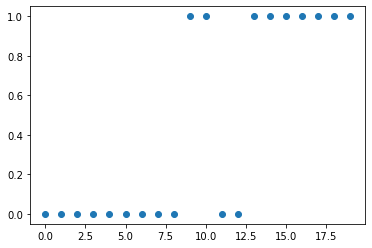

In [2]:
X_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
X_train = X_train.reshape(-1, 1) 

y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])
y_train = y_train.reshape(-1, 1) 

sample_x = np.linspace(0, 20, 100).reshape(-1, 1)

plt.scatter(X_train, y_train)
plt.show

### using log odds, sigmoid

In [3]:
def log_odds(features, coefficients, intercept):
    return np.dot(features, coefficients) + intercept

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Make simple model

In [5]:
class Logistic_Regression():
    def __init__(self):
        '''
        w: weight, b: bias
        threshold: default=0.5
        '''
        self.w = 0
        self.b = 0
        self.threshold = 0.5

    def predict(self, x, threshold=None):
        ''' 
        주어진 x를 모델에 저장된 param을 이용해 예측
        threshold는 parameter로 받을 수 있음
        '''
        h, _ = self.forward_pass(x)
        if threshold is None:
            return np.where(h >= self.threshold, 1, 0)
        else:
            return np.where(h >= threshold, 1, 0)

    def step_grad(self, x, y, learning_rate=0.01):
        '''
        주어진 x, y에 대해
        forward_pass에서 계산된 h, z값을 통해
        backward_pass에서 클래스 내의 w, b에 대한 gradient를 계산하여
        클래스 내의 w, b 값 update
        learning_rate는 default 값으로 0.01을 사용
        '''
        h, z = self.forward_pass(x)
        dL_dw, dL_db = self.backward_pass(x, h, z, y) 
        self.w = self.w - (learning_rate * dL_dw)
        self.b = self.b - (learning_rate * dL_db)
    
    def train(self, x, y, epochs=1, learning_rate=0.01):
        ''' 
        주어진 x, y를 epochs 수만큼 step_grad 진행
        파라미터 값은 클래스 내에 저장
        epoch마다 loss_history 반환
        이때 반환하는 loss는 total loss(batch 수로 평균내지 않음)
        '''
        loss_history = []
        for epoch in range(epochs):
            self.step_grad(x, y, learning_rate=learning_rate)
            loss = self._get_loss(x, y)
            loss_history.append(loss)
        return loss_history
    
    def _backward_w(self, x, z, y):
        '''
        Chain Rule을 통해 Loss를 w로 미분
        '''
        dL_dz = (1-y) - np.exp(-z)/(1+np.exp(-z))
        dz_dw = x
        dL_dw = dL_dz * dz_dw
        return np.sum(dL_dw)/y.shape[0]
    
    def _backward_b(self, z, y):
        '''
        Chain Rule을 통해 Loss를 b로 미분
        '''
        dL_dz = (1-y) - np.exp(-z)/(1+np.exp(-z))
        dz_db = 1
        dL_db = dL_dz * dz_db
        return np.sum(dL_db)/y.shape[0]

    def forward_pass(self, x):
        '''
        주어진 x에 대해 log_odd 값과 sigmoid를 통한 확률 값 계산하여 리턴
        '''
        z = log_odds(x, self.w, self.b)
        h = sigmoid(z)
        return h, z

    def backward_pass(self, x, h, z, y):
        '''
        주어진 x, y와 forward_pass에서 계산된 h, z를 이용해
        Loss를 w와 b에 대해 미분한 값 전달
        '''
        dL_dw = self._backward_w(x, z, y)
        dL_db = self._backward_b(z, y)
        return dL_dw, dL_db

    def _log_loss(self, h, y):
        '''
        확률과 y값 간의 이용해 log loss 계산 함수, batch 평균 x
        '''
        return -(y * np.log(h) + (1-y) * np.log(1-h))
    
    def _get_loss(self, x, y):
        '''
        주어진 x, y의 log loss 계산 함수
        '''
        h, _ = self.forward_pass(x)
        return np.sum(self._log_loss(h, y))

## Define Model

In [6]:
model = Logistic_Regression()

## Train your Model

In [7]:
loss_history = model.train(X_train, y_train, epochs=3000, learning_rate=0.1)

In [8]:
print(model.w, model.b, model.threshold)

0.5889255449424291 -6.149879653613097 0.5


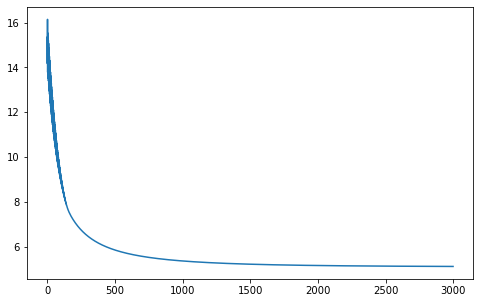

In [9]:
fig = plt.figure(figsize=(8,5))
plt.plot(loss_history[:])

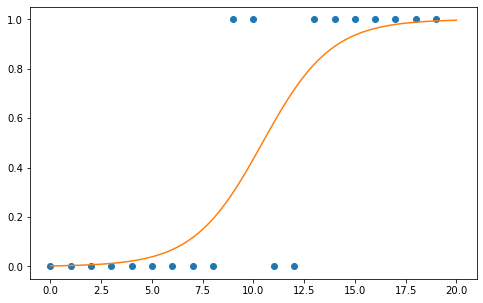

In [10]:
probability,_ = model.forward_pass(sample_x)

fig = plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, 'o')
plt.plot(sample_x, probability)
plt.show()